## Sales Analysis

#### Importamos librerias

In [1]:
import os
import pandas as pd

#### Merge para los archivos csv

In [2]:
path = "./Sales_Data"
files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files


all_months_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+"/"+file)
    all_months_data = pd.concat([all_months_data, current_data])
    
all_months_data.to_csv("./Sales_Data/all_data.csv", index=False)
    

#### Read csv

In [3]:
all_data = pd.read_csv("./Sales_Data/all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [6]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560550 entries, 0 to 560549
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          558915 non-null  object
 1   Product           558915 non-null  object
 2   Quantity Ordered  558915 non-null  object
 3   Price Each        558915 non-null  object
 4   Order Date        558915 non-null  object
 5   Purchase Address  558915 non-null  object
dtypes: object(6)
memory usage: 25.7+ MB



#### ¡Limpie los datos!
* El primer paso en esto es averiguar qué necesitamos limpiar.
* A medida que vamos realizando operaciones vamos obteniendo errores y en funcion de estos errores vamos decidiendo como proceder con la limpieza de datos.

##### ELiminar filas con valores NAN

In [7]:
# Find NAN
nan_df = all_data[all_data.isna().any(axis=1)]
display(nan_df.head())

all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


##### Quitamos aquellas filas que tengan como valor Or en la columna Order Date

In [13]:
all_data[all_data['Order Date'].str[0:2] =='Or']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [10]:
all_data = all_data[all_data['Order Date'].str[0:2] !='Or']
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
560545,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
560546,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
560547,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
560548,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [11]:
all_data[all_data['Quantity Ordered'].str[0:2] =='Qu']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [12]:
all_data = all_data[all_data['Quantity Ordered'].str[0:2] !='Qu']

#### Hacer las columnas del tipo de dato correcto

In [14]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

In [15]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 557850 entries, 0 to 560549
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          557850 non-null  object 
 1   Product           557850 non-null  object 
 2   Quantity Ordered  557850 non-null  int64  
 3   Price Each        557850 non-null  float64
 4   Order Date        557850 non-null  object 
 5   Purchase Address  557850 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 29.8+ MB


### Agregar columnas adicionales

#### Agregamos la columna Month

In [16]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### agregando la columna con un metodo alternativo

In [17]:
all_data['Month 2'] = pd.to_datetime(all_data['Order Date']).dt.month
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month 2
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,4


#### Agregando la columna city

In [27]:
#Aplicando funcion con lambda de manera directa
all_data['Purchase Address'].apply(lambda s: "{}".format(s.split(",")[1].strip(" ") ))

0                Dallas
2                Boston
3           Los Angeles
4           Los Angeles
5           Los Angeles
              ...      
560545      Los Angeles
560546    San Francisco
560547    San Francisco
560548    San Francisco
560549    San Francisco
Name: Purchase Address, Length: 557850, dtype: object

In [24]:
#Aplicando funcion con lambda de manera directa
#applymap para series y con dobles corchetes convierto en serie
all_data['state'] = all_data[['Purchase Address']].applymap(lambda s: "{}".format(s.split(",")[2].split(" ")[1] ))
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month 2,City,state
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,4,Dallas (TX),TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,4,Boston (MA),MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,Los Angeles (CA),CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,Los Angeles (CA),CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,4,Los Angeles (CA),CA


In [25]:
#usando funciones
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month 2,City,state
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,4,Dallas (TX),TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,4,Boston (MA),MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,Los Angeles (CA),CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,Los Angeles (CA),CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,4,Los Angeles (CA),CA


### Data Exploration!

#### Pregunta 1: ¿Cuál fue el mejor mes para las ventas? ¿Cuánto se ganó ese mes?

In [30]:
all_data['Sales'] = all_data['Quantity Ordered'].astype('int') * all_data['Price Each'].astype('float')

In [31]:
all_data.groupby(['Month']).sum()

/tmp/ipykernel_167/2666040485.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  all_data.groupby(['Month']).sum()


,Quantity Ordered,Price Each,Month 2,Sales
Month,,,,
1,32709,5435305.14,29127,5466770.19
2,40347,6566654.16,71850,6606067.26
3,51015,8373623.49,136377,8421301.14
4,61674,10103013.06,219348,10172010.72
5,56001,9405375.39,248490,9457820.25
6,45759,7686076.83,243972,7733406.78
7,48216,7897618.68,300153,7943327.28
8,40344,6691036.26,287064,6733403.64
9,39327,6254976.27,313767,6292680.39


In [34]:
all_data[['Month', 'Sales']].groupby(['Month']).sum()

,Sales
Month,
1,5466770.19
2,6606067.26
3,8421301.14
4,10172010.72
5,9457820.25
6,7733406.78
7,7943327.28
8,6733403.64
9,6292680.39


In [32]:
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 8.8 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 8.8 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 KB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.7/299.7 KB 7.7 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 8.8 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.9 MB/s eta 0:00:0000:0100:01m
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


range(1, 13)


/tmp/ipykernel_167/1114561028.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.bar(months,all_data.groupby(['Month']).sum()['Sales'])


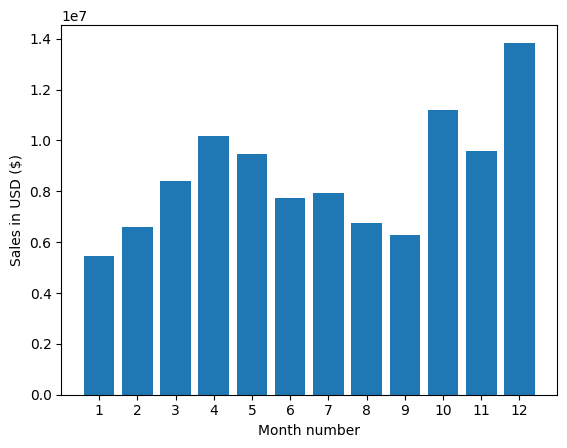

In [33]:
import matplotlib.pyplot as plt

months = range(1,13)
print(months)

plt.bar(months,all_data.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()



#### Pregunta 2: ¿Qué ciudad vendió más producto?

In [36]:
all_data.groupby(['City']).sum()

/tmp/ipykernel_167/4158429969.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  all_data.groupby(['City']).sum()


,Quantity Ordered,Price Each,Month,Month 2,Sales
City,,,,,
Atlanta (GA),49806,8339724.60,314382,314382,8386495.74
Austin (TX),33459,5429620.83,209487,209487,5458745.25
Boston (MA),67584,10912229.31,423336,423336,10984926.03
Dallas (TX),50190,8257883.46,313860,313860,8303926.20
Los Angeles (CA),99867,16264305.69,624975,624975,16357712.40
New York City (NY),83796,13906112.49,527223,527223,13992952.29
Portland (ME),8250,1341567.75,51432,51432,1349274.81
Portland (OR),33909,5581674.66,211863,211863,5612197.02
San Francisco (CA),150717,24634385.22,946560,946560,24786611.73


/tmp/ipykernel_510/1422309745.py:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  keys = [city for city, df in all_data.groupby(['City'])]
/tmp/ipykernel_510/1422309745.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.bar(keys,all_data.groupby(['City']).sum()['Sales'])


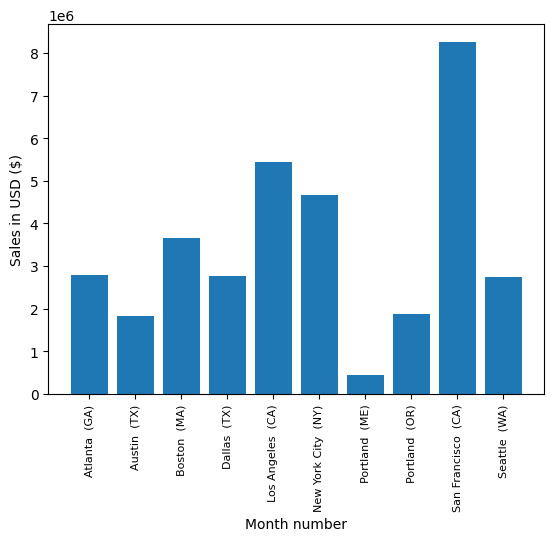

In [19]:
import matplotlib.pyplot as plt

keys = [city for city, df in all_data.groupby(['City'])]

plt.bar(keys,all_data.groupby(['City']).sum()['Sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

#### Pregunta 3: ¿A qué hora debemos mostrar anuncios para maximizar la probabilidad de que el cliente compre el producto?

In [38]:
# Add hour column
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute
all_data['Count'] = 1
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month 2,City,state,Sales,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,4,Dallas (TX),TX,23.90,8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,4,Boston (MA),MA,99.99,22,30,1
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,Los Angeles (CA),CA,600.00,14,38,1
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,Los Angeles (CA),CA,11.99,14,38,1
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,4,Los Angeles (CA),CA,11.99,9,27,1


/tmp/ipykernel_167/784508144.py:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  keys = [pair for pair, df in all_data.groupby(['Hour'])]


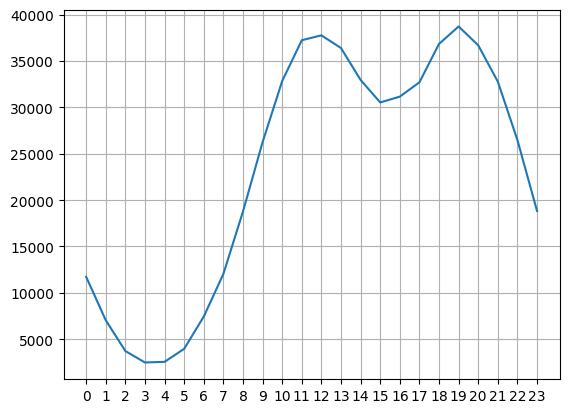

In [39]:
keys = [pair for pair, df in all_data.groupby(['Hour'])]

plt.plot(keys, all_data.groupby(['Hour']).count()['Count'])
plt.xticks(keys)
plt.grid()
plt.show()

# My recommendation is slightly before 11am or 7pm

In [40]:
#¿Cuantos productos se vendieron por mes y día?
all_data['day'] = pd.to_datetime(all_data['Order Date']).dt.day

In [41]:
all_data.groupby(["Month","day"]).sum()["Quantity Ordered"]

/tmp/ipykernel_167/775134048.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  all_data.groupby(["Month","day"]).sum()["Quantity Ordered"]


Month  day
1      1      1152
       2      1104
       3       990
       4       990
       5      1065
              ... 
12     27     2607
       28     2793
       29     2862
       30     2784
       31     2658
Name: Quantity Ordered, Length: 365, dtype: int64